In [3]:
import astropy.io
from astropy.io import fits
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp
import scipy.optimize as opt
from scipy.optimize import curve_fit
from itertools import islice


In [4]:
target1 = pd.read_csv('J081625.40+064535.1.csv')
#abflux = 3631 * 3.6 * 10**(-10) * np.sinh(-(0.92103 * target1.Mag)+22.4328)
opflux = 10**(23-(target1.Mag +48.6)/2.5)
opflux_err = 10**(23-(target1.Mag + target1.Magerr +48.6)/2.5) - 10**(23-(target1.Mag +48.6)/2.5)
#opflux_err = (3631 * 3.6 * 10**(-10) * np.sinh(-0.92103 * (target1.Mag + target1.Magerr)+22.4328)) - (3631 * 3.6 * 10**(-10) * np.sinh(-(0.92103 * target1.Mag)+22.4328))                

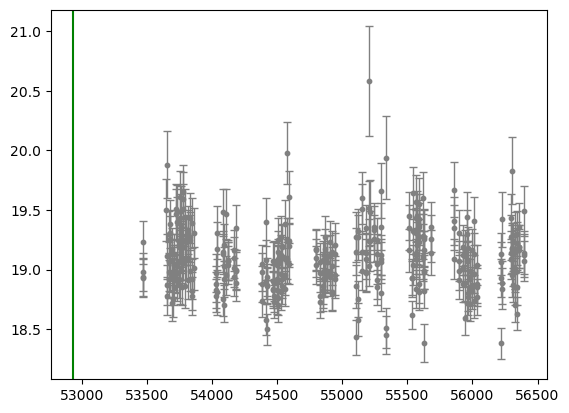

In [5]:
plt.scatter(target1.MJD,target1.Mag, s = 10, color = 'gray')
plt.errorbar(target1.MJD,target1.Mag, yerr = target1.Magerr, fmt = 'None', linewidth=1, capsize=3, color = 'gray')
plt.axvline(x= 	52934, color ='g')	
#plt.axvline(x= , color ='g')	

In [6]:
sorted_MJD =sorted(target1.MJD)
len(sorted_MJD)

354

In [7]:
diff = []
for i in range(0,len(sorted_MJD)-1):
    diff.append(sorted_MJD[i+1] -sorted_MJD[i])
diff

[0.008060000000114087,
 0.008060000000114087,
 0.008179999997082632,
 182.27735000000393,
 3.0007600000026287,
 0.004349999995611142,
 0.004300000000512227,
 0.00428999999712687,
 18.024710000005143,
 0.0031699999963166192,
 0.0032199999986914918,
 0.003200000006472692,
 9.939379999996163,
 0.006460000004153699,
 0.006459999996877741,
 0.006479999996372499,
 9.003730000003998,
 0.007530000002589077,
 0.007509999995818362,
 0.007539999998698477,
 14.893159999999625,
 0.006500000003143214,
 0.006479999996372499,
 7.003060000002733,
 0.007519999999203719,
 0.007570000001578592,
 0.007610000000568107,
 15.946869999999763,
 0.009449999997741543,
 0.009480000000621658,
 0.00953999999910593,
 5.949099999997998,
 0.008080000006884802,
 0.008109999995213002,
 0.00811000000248896,
 10.985650000002352,
 0.005289999993692618,
 0.0052900000009685755,
 0.005300000004353933,
 9.893339999995078,
 0.008509999999660067,
 0.00856000000203494,
 0.00856000000203494,
 6.9630899999974645,
 0.0064300000012735

In [8]:
sum = 0
seppt = []
for j in range (0,len(diff)):
    if diff[j] >100:
        sum += 1
        seppt.append(j)
print(sum)
seppt

8


[3, 75, 104, 156, 192, 232, 274, 314]

In [9]:
slice_length = []
slice_length.append(seppt[0]+1)

for i in range(0,len(seppt)-1):
    slice_length.append(seppt[i+1]-seppt[i])
slice_length.append(len(sorted_MJD)-seppt[-1])
slice_length

[4, 72, 29, 52, 36, 40, 42, 40, 40]

In [10]:
Input = iter(sorted_MJD)
grouped_MJD =  [list(islice(Input, elem)) for elem in slice_length] 

In [11]:
data = target1.sort_values('MJD')
target1.sort_values('MJD')

,InputID,ID,Mag,Magerr,RA,Decl,MJD,Blend
0,J081625.40+064535.1,1107044035947,18.98,0.16,124.10594,6.75969,53466.16059,0
1,J081625.40+064535.1,1107044035947,18.94,0.16,124.10595,6.75936,53466.16865,0
2,J081625.40+064535.1,1107044035947,19.23,0.18,124.10616,6.75969,53466.17671,0
3,J081625.40+064535.1,1107044035947,18.93,0.16,124.10599,6.75953,53466.18489,0
27,J081625.40+064535.1,1107044035947,19.50,0.26,124.10588,6.75955,53648.46224,0
...,...,...,...,...,...,...,...,...
349,J081625.40+064535.1,1107044035947,19.19,0.18,124.10566,6.75971,56358.20540,0
350,J081625.40+064535.1,1107044035947,19.07,0.17,124.10586,6.75983,56397.13105,0
351,J081625.40+064535.1,1107044035947,19.14,0.18,124.10572,6.75976,56397.13820,0
352,J081625.40+064535.1,1107044035947,19.49,0.21,124.10578,6.75986,56397.14549,0


In [12]:
df_1 = data.iloc[:seppt[0],:]
df_1.to_csv('Group1.csv', index=False)
#print(df_1)
grouped_MJD[0][-1]

53466.18489

In [13]:
df_2 = data.iloc[seppt[0]+1:seppt[1],:]
#print(df_2)
df_2.to_csv('Group2.csv', index=False)
grouped_MJD[1][-1]

53858.15247

In [14]:
df_3 = data.iloc[seppt[1]+1:seppt[2],:]
#print(df_3)
df_3.to_csv('Group3.csv', index=False)
grouped_MJD[2][-1]

54180.17651

In [15]:
df_4 = data.iloc[seppt[2]+1:seppt[3],:]
#print(df_4)
df_4.to_csv('Group4.csv', index=False)
grouped_MJD[3][-1]

54588.15351

In [16]:
df_5 = data.iloc[seppt[3]+1:seppt[4],:]
#print(df_5)
df_5.to_csv('Group5.csv', index=False)
grouped_MJD[4][-1]

54944.18026

In [17]:
df_6 = data.iloc[seppt[4]+1:seppt[5],:]
#print(df_6)
df_6.to_csv('Group6.csv', index=False)
grouped_MJD[5][-1]

55337.14937

In [18]:
df_7 = data.iloc[seppt[5]+1:seppt[6],:]
#print(df_7)
df_7.to_csv('Group7.csv', index=False)
grouped_MJD[6][-1]

55683.18524

In [19]:
df_8 = data.iloc[seppt[6]+1:seppt[7],:]
#print(df_8)
df_8.to_csv('Group8.csv', index=False)
grouped_MJD[7][-1]

56035.14248

In [21]:
df_9 = data.iloc[seppt[7]+1:,:]
#print(df_9)
df_9.to_csv('Group9.csv', index=False)
grouped_MJD[8][-1]

56397.1528

In [ ]:
df_10 = data.iloc[seppt[8]+1:seppt[9],:]
#print(df_10)
df_10.to_csv('Group10.csv', index=False)
grouped_MJD[9][-1]

In [ ]:
df_11 = data.iloc[seppt[9]+1:seppt[10],:]
#print(df_11)
df_11.to_csv('Group11.csv', index=False)
grouped_MJD[10][-1]

In [ ]:
df_12 = data.iloc[seppt[10]+1:,:]
#print(df_12)
df_12.to_csv('Group12.csv', index=False)
grouped_MJD[11][-1]

In [22]:
med = []
centerMJD = []
medMJD = []
medopflux = []

g1 = pd.read_csv('group1.csv')
med1 = np.median(g1.Mag)
centerMJD1 = np.mean(g1.MJD)
medMJD1 = np.median(g1.MJD)
medMJD.append(medMJD1)
med.append(med1)
centerMJD.append(centerMJD1)
opflux1 = 10**(23-(g1.Mag +48.6)/2.5)
med_opflux1 = np.median(opflux1)
medopflux.append(med_opflux1)


g2 = pd.read_csv('group2.csv')
med1 = np.median(g2.Mag)
centerMJD1 = np.mean(g2.MJD)
medMJD1 = np.median(g2.MJD)
medMJD.append(medMJD1)
med.append(med1)
centerMJD.append(centerMJD1)
opflux1 = 10**(23-(g2.Mag +48.6)/2.5)
med_opflux1 = np.median(opflux1)
medopflux.append(med_opflux1)

g3 = pd.read_csv('group3.csv')
med1 = np.median(g3.Mag)
centerMJD1 = np.mean(g3.MJD)
medMJD1 = np.median(g3.MJD)
medMJD.append(medMJD1)
med.append(med1)
centerMJD.append(centerMJD1)
opflux1 = 10**(23-(g3.Mag +48.6)/2.5)
med_opflux1 = np.median(opflux1)
medopflux.append(med_opflux1)

g4 = pd.read_csv('group4.csv')
med1 = np.median(g4.Mag)
centerMJD1 = np.mean(g4.MJD)
medMJD1 = np.median(g4.MJD)
medMJD.append(medMJD1)
med.append(med1)
centerMJD.append(centerMJD1)
opflux1 = 10**(23-(g4.Mag +48.6)/2.5)
med_opflux1 = np.median(opflux1)
medopflux.append(med_opflux1)

g5 = pd.read_csv('group5.csv')
med1 = np.median(g5.Mag)
centerMJD1 = np.mean(g5.MJD)
medMJD1 = np.median(g5.MJD)
medMJD.append(medMJD1)
med.append(med1)
centerMJD.append(centerMJD1)
opflux1 = 10**(23-(g5.Mag +48.6)/2.5)
med_opflux1 = np.median(opflux1)
medopflux.append(med_opflux1)

g6 = pd.read_csv('group6.csv')
med1 = np.median(g6.Mag)
centerMJD1 = np.mean(g6.MJD)
medMJD1 = np.median(g6.MJD)
medMJD.append(medMJD1)
med.append(med1)
centerMJD.append(centerMJD1)
opflux1 = 10**(23-(g6.Mag +48.6)/2.5)
med_opflux1 = np.median(opflux1)
medopflux.append(med_opflux1)

g7 = pd.read_csv('group7.csv')
med1 = np.median(g7.Mag)
centerMJD1 = np.mean(g7.MJD)
medMJD1 = np.median(g7.MJD)
medMJD.append(medMJD1)
med.append(med1)
centerMJD.append(centerMJD1)
opflux1 = 10**(23-(g7.Mag +48.6)/2.5)
med_opflux1 = np.median(opflux1)
medopflux.append(med_opflux1)

g8 = pd.read_csv('group8.csv')
med1 = np.median(g8.Mag)
centerMJD1 = np.mean(g8.MJD)
medMJD1 = np.median(g8.MJD)
medMJD.append(medMJD1)
med.append(med1)
centerMJD.append(centerMJD1)
opflux1 = 10**(23-(g8.Mag +48.6)/2.5)
med_opflux1 = np.median(opflux1)
medopflux.append(med_opflux1)

g9 = pd.read_csv('group9.csv')
med1 = np.median(g9.Mag)
centerMJD1 = np.mean(g9.MJD)
medMJD1 = np.median(g9.MJD)
medMJD.append(medMJD1)
med.append(med1)
centerMJD.append(centerMJD1)
opflux1 = 10**(23-(g9.Mag +48.6)/2.5)
med_opflux1 = np.median(opflux1)
medopflux.append(med_opflux1)



In [ ]:
g10= pd.read_csv('group10.csv')
med1 = np.median(g10.Mag)
centerMJD1 = np.mean(g10.MJD)
medMJD1 = np.median(g10.MJD)
medMJD.append(medMJD1)
med.append(med1)
centerMJD.append(centerMJD1)
opflux1 = 10**(23-(g10.Mag +48.6)/2.5)
med_opflux1 = np.median(opflux1)
medopflux.append(med_opflux1)

g11= pd.read_csv('group11.csv')
med1 = np.median(g11.Mag)
centerMJD1 = np.mean(g11.MJD)
medMJD1 = np.median(g11.MJD)
medMJD.append(medMJD1)
med.append(med1)
centerMJD.append(centerMJD1)
opflux1 = 10**(23-(g11.Mag +48.6)/2.5)
med_opflux1 = np.median(opflux1)
medopflux.append(med_opflux1)

g12= pd.read_csv('group12.csv')
med1 = np.median(g12.Mag)
centerMJD1 = np.mean(g12.MJD)
medMJD1 = np.median(g12.MJD)
medMJD.append(medMJD1)
med.append(med1)
centerMJD.append(centerMJD1)
opflux1 = 10**(23-(g12.Mag +48.6)/2.5)
med_opflux1 = np.median(opflux1)
medopflux.append(med_opflux1)


In [23]:
med

[18.98, 19.13, 19.035, 18.96, 18.99, 19.15, 19.23, 19.01, 19.14]

In [24]:
centerMJD

[53466.16865,
 53745.9171456338,
 54102.09595321428,
 54495.49636901961,
 54870.87887885714,
 55210.336546153856,
 55584.48363414633,
 55956.10905564103,
 56311.91610307692]

In [25]:
medMJD


[53466.16865,
 53743.3775,
 54090.377114999996,
 54505.23069,
 54864.2472,
 55203.28792,
 55586.28928,
 55958.21407,
 56324.24074]

In [26]:
medopflux


[9.289663867799363e-05,
 8.09095899178378e-05,
 8.830892644344221e-05,
 9.46237161365791e-05,
 9.204495717531685e-05,
 7.94328234724279e-05,
 7.379042301291045e-05,
 9.036494737223004e-05,
 8.016780633876723e-05]

In [28]:
st = 53466
#start of observations

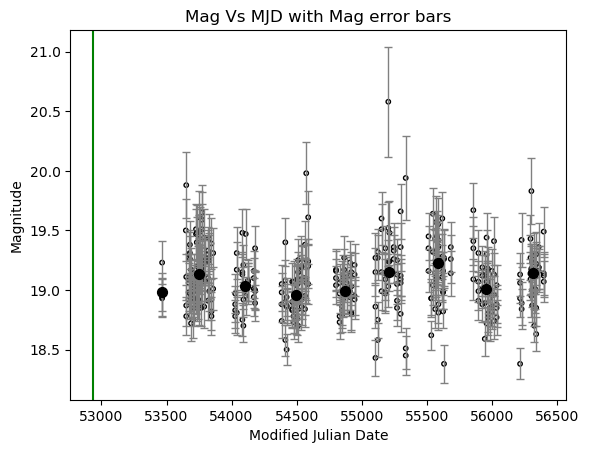

In [29]:
plt.scatter(target1.MJD,target1.Mag , s = 10, edgecolors = 'k', facecolors = 'none', zorder = 1)
plt.scatter(centerMJD,med, s =50, color = 'k', zorder =3 )
plt.errorbar(target1.MJD,target1.Mag, yerr = target1.Magerr, fmt = 'None', linewidth=1, capsize=3, color = 'gray', zorder=2)
plt.xlabel('Modified Julian Date')
plt.ylabel('Magnitude')
plt.title('Mag Vs MJD with Mag error bars')

plt.axvline(x=	52934  , color ='g')	
#plt.axvline(x=  , color ='g')	

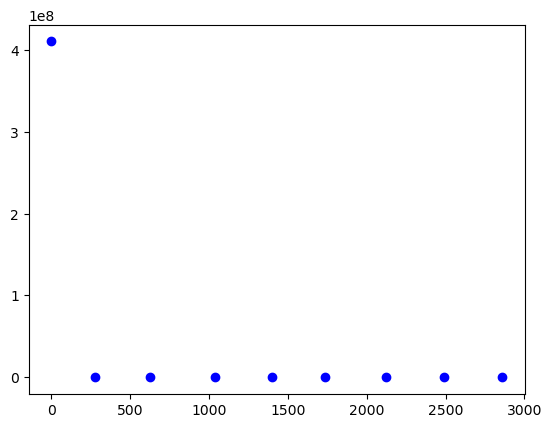

In [30]:
def f(x, a, b, c):
    return a * (x ** b) + c
x = np.array([item - st for item in medMJD])
y = f(x,4.05245427e+07,-1.3, 1.81095672e+01)
rng = np.random.default_rng()
y_noise = 0.001* rng.normal(size=x.size)
ydata = y + y_noise
plt.scatter(x, ydata, color = 'b')


In [31]:
popt3, pcov3 = curve_fit(f, x, med, maxfev =5000)


In [32]:
popt3

array([9.77917385e-07, 1.45973454e+00, 1.90252018e+01])

In [33]:
pcov3

array([[ 6.69367941e-10, -8.55108973e-05, -1.43494326e-06],
       [-8.55108973e-05,  1.09370534e+01,  1.78884919e-01],
       [-1.43494326e-06,  1.78884919e-01,  5.67816757e-03]])

In [34]:
 np.sqrt(np.diag(pcov3))

array([2.58721460e-05, 3.30712162e+00, 7.53536168e-02])

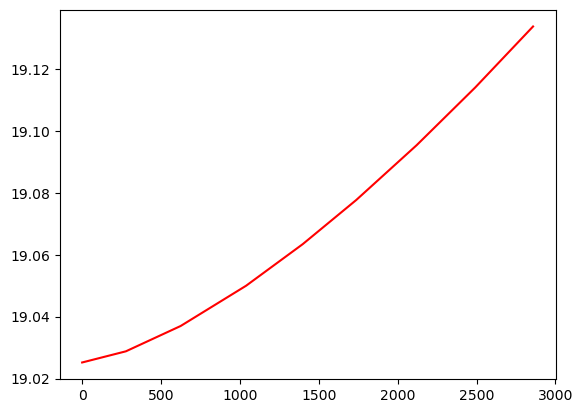

In [35]:
plt.plot(x, f(x,*popt3), 'r-')

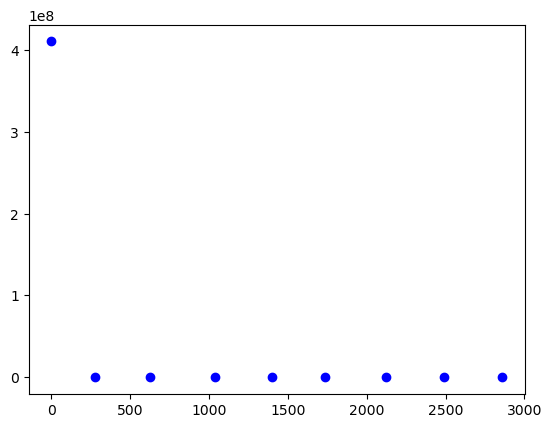

In [36]:
def g(x, a, b):
    return a * (x ** b) + 18
x = np.array([item - st	 for item in medMJD])
y = g(x,4.05245427e+07,-1.3)
rng = np.random.default_rng()
y_noise = 0.001* rng.normal(size=x.size)
ydata = y + y_noise
plt.scatter(x, ydata, color = 'b')


In [37]:
popt4, pcov4 = curve_fit(f, target1.MJD - st	, target1.Mag )

In [38]:
popt4

array([-2.15280707e-03,  2.83797491e-01,  1.91088829e+01])

In [39]:
pcov4

array([[ 7.04585104e-03,  3.22755314e-01, -1.49450692e-02],
       [ 3.22755314e-01,  1.49213540e+01, -6.68831473e-01],
       [-1.49450692e-02, -6.68831473e-01,  3.37189603e-02]])

In [40]:
 np.sqrt(np.diag(pcov4))

array([0.08393957, 3.86281685, 0.18362723])

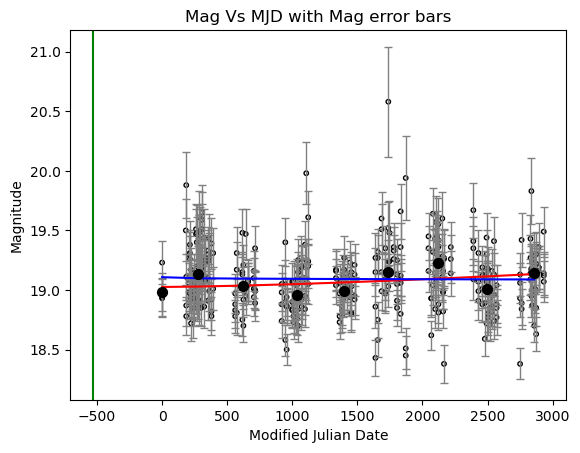

In [41]:
x = np.array([item - st for item in medMJD])
MJD = np.array([item - st for item in target1.MJD])
plt.scatter(MJD,target1.Mag , s = 10, edgecolors = 'k', facecolors = 'none', zorder = 1)
plt.scatter(x,med, s =50, color = 'k', zorder =4 )
plt.errorbar(MJD,target1.Mag, yerr = target1.Magerr, fmt = 'None', linewidth=1, capsize=3, color = 'gray', zorder=2)
plt.xlabel('Modified Julian Date')
plt.ylabel('Magnitude')
plt.title('Mag Vs MJD with Mag error bars')

plt.axvline(x= 	52934 -st, color ='g')	
#plt.axvline(x= -st, color ='g')
plt.plot(x, f(x,*popt3), 'r-', zorder=3)
plt.plot(x, f(x,*popt4), 'b-', zorder=3)
#plt.plot(x, g(x, 0.66649567, -0.32796038), 'y-', zorder=3)
#plt.plot(x, g(x,-2.99993383e+00,  1.00423610e-02,  2.17984336e+01), 'g', zorder=3)



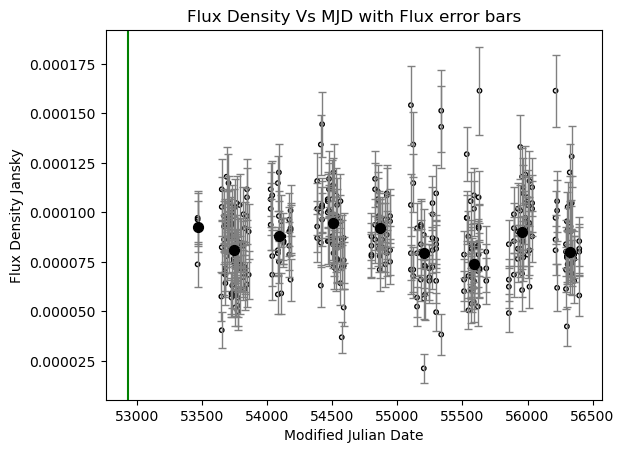

In [42]:
plt.scatter(target1.MJD ,opflux , s = 10, edgecolors = 'k', facecolors = 'none', zorder = 1)
#plt.scatter(target1.MJD ,abflux , s = 10, edgecolors = 'r', facecolors = 'none', zorder = 1)
plt.scatter(medMJD ,medopflux , s =50, color = 'k', zorder =3 )
plt.errorbar(target1.MJD,opflux, yerr = np.absolute(opflux_err), fmt = 'None', linewidth=1, capsize=3, color = 'gray', zorder=2)
plt.xlabel('Modified Julian Date')
plt.ylabel('Flux Density Jansky')
plt.title('Flux Density Vs MJD with Flux error bars')
#plt.ylim(0, 0.0004)

plt.axvline(x= 	52934 , color ='g')	
#plt.axvline(x= , color ='g')

In [43]:
popt2, pcov2 = curve_fit(f, x, medopflux, maxfev =5000)

In [44]:
popt2

array([-4.10955945e-11,  1.53695121e+00,  8.91858425e-05])

In [45]:
pcov2

array([[ 1.29886737e-18,  3.94700801e-09, -4.75725717e-15],
       [ 3.94700801e-09,  1.20073416e+01, -1.41208682e-05],
       [-4.75725717e-15, -1.41208682e-05,  3.27025918e-11]])

In [46]:
 np.sqrt(np.diag(pcov2))

array([1.13967863e-09, 3.46516112e+00, 5.71861799e-06])

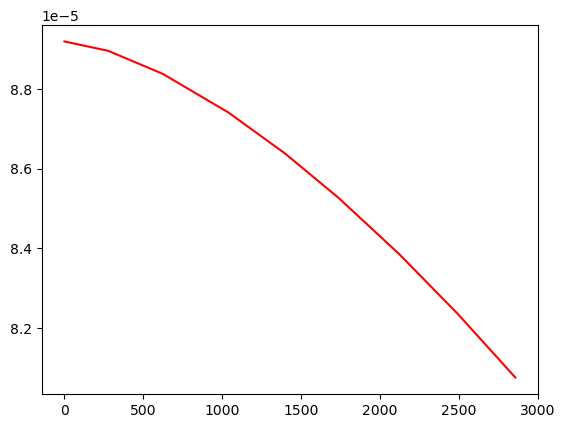

In [47]:
plt.plot(x, f(x,*popt2), 'r-')

In [48]:
popt1, pcov1 = curve_fit(f, target1.MJD - st, opflux, maxfev =5000)

In [49]:
popt1

array([3.83371811e-07, 2.66339795e-01, 8.35969966e-05])

In [50]:
pcov1

array([[ 5.15263638e-11, -1.33402868e-05, -1.02140162e-10],
       [-1.33402868e-05,  3.48795348e+00,  2.58302676e-05],
       [-1.02140162e-10,  2.58302676e-05,  2.14662307e-10]])

In [51]:
 np.sqrt(np.diag(pcov1))

array([7.17818667e-06, 1.86760635e+00, 1.46513586e-05])

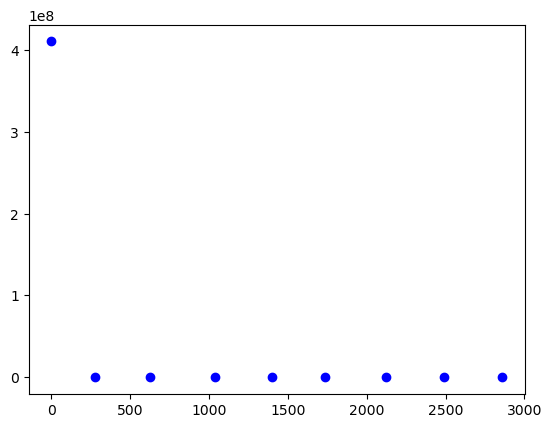

In [52]:
def h(x, a, b):
    return a * (x ** b) + 0.00015
x = np.array([item - st	 for item in medMJD])
y = h(x,4.05245427e+07,-1.3)
rng = np.random.default_rng()
y_noise = 0.001* rng.normal(size=x.size)
ydata = y + y_noise
plt.scatter(x, ydata, color = 'b')


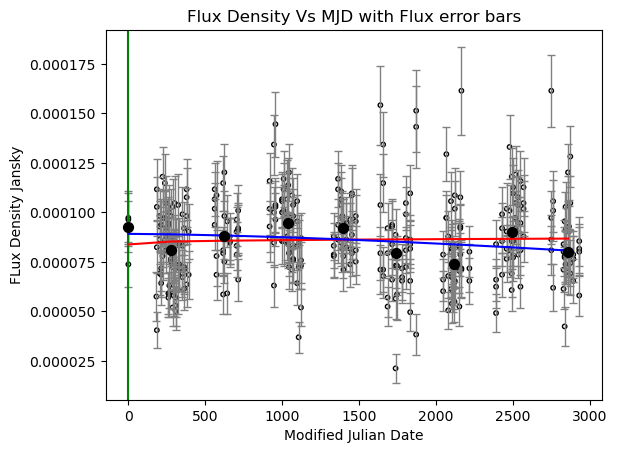

In [54]:
x = np.array([item - st for item in medMJD])
MJD = np.array([item - st for item in target1.MJD])
plt.scatter(MJD,opflux , s = 10, edgecolors = 'k', facecolors = 'none', zorder = 1)
plt.scatter(x,medopflux, s =50, color = 'k', zorder =4 )
plt.errorbar(MJD,opflux, yerr =np.absolute(opflux_err), fmt = 'None', linewidth=1, capsize=3, color = 'gray', zorder=2)
plt.xlabel('Modified Julian Date')
plt.ylabel('FLux Density Jansky')
plt.title('Flux Density Vs MJD with Flux error bars')
#plt.ylim(0, 0.0004)

plt.axvline(x= 53466 -st, color ='g')	
#plt.axvline(x= -st, color ='g')
plt.plot(x, f(x, *popt1), 'r-', zorder=3)
plt.plot(x, f(x,*popt2), 'b-', zorder=3)
#plt.plot(x, h(x,-2.99993383e+00,  1.00423610e-02,  2.17984336e+01), 'b-', zorder=3)
#plt.plot(x, h(x,-2.99993383e+00,  1.00423610e-02,  2.17984336e+01), 'g-', zorder=3)


In [ ]:
def mase(actual : np.ndarray, predicted : np.ndarray):

    forecast_error = np.mean(np.abs(actual - predicted))
    naive_forecast = np.mean(np.abs(np.diff(actual)))
    mase = forecast_error / naive_forecast

    return mase

In [ ]:
actual = medopflux
predicted1 = func(x,)
predicted2 = func(x,)



In [ ]:
mase(actual,predicted1)

In [ ]:
mase(actual,predicted2)

In [ ]:
resid = opflux - func(x,)
chi2 = sum((resid / func(x,))**2)
chi2_red = chi2 / dof
